In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

**Import datasets**

In [21]:
file_location = '../data/raw_data/'

# import training file
df1 = pd.read_csv(f'{file_location}train.csv')
df1['date_recorded'] = pd.to_datetime(df1['date_recorded'])

# import labels (target-variables) for training file
df2 = pd.read_csv(f'{file_location}trainlabels.csv')
df2.columns = ['id', 'target_var']

# merge training file and it's labels (target variable)
df = pd.merge(df1, df2)

**Data Wrangling**

In [23]:
df.shape

(59400, 41)

check if the column: id is unique

In [30]:
df['id'].is_unique

True

Assign appropriate datatypes

In [31]:
# convert datatype of cols from int to str
cols = ['id','region_code','district_code',]
for col in cols:
    df[col] = df[col].astype('str')

data dictionary: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/

In [32]:
pd.concat([df.iloc[0].T,df.dtypes, df.nunique()], 
          axis = 1, 
          keys = ['first row','dtype','nunique()'])

,first row,dtype,nunique()
id,69572,object,59400
amount_tsh,6000,float64,98
date_recorded,2011-03-14 00:00:00,datetime64[ns],356
funder,Roman,object,1897
gps_height,1390,int64,2428
installer,Roman,object,2145
longitude,34.9381,float64,57516
latitude,-9.85632,float64,57517
wpt_name,none,object,37400
num_private,0,int64,65


### 1. Data Cleaning

drop duplicate rows

In [33]:
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(59400, 41)
(59400, 41)


### 2. Missing Values

In [34]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

only show columns where instances of missing value > 0

In [35]:
miss = df.isna().sum()[df.isna().sum() > 0] 

pd.concat([miss, round(miss/df.shape[0]*100,1), df.nunique(), df.dtypes], 
          axis = 1, join = 'inner',
          keys = ['missing','missing %', 'nunique()', 'datatype'])\
          .sort_values(by = 'missing %',
                       ascending = False)

,missing,missing %,nunique(),datatype
scheme_name,28166,47.4,2696,object
scheme_management,3877,6.5,12,object
installer,3655,6.2,2145,object
funder,3635,6.1,1897,object
public_meeting,3334,5.6,2,object
permit,3056,5.1,2,object
subvillage,371,0.6,19287,object


Observation:
1. There are 7 out of 40 (not including target) features with missing data.
2. Among the 7 features, 5 are string, and 2 are boolean

Step:
No data imputation methods applied to deal with missing data in  string/object/categorical variables/features.

---

Among numeric features, column: ***population** has missing values encoded as **0**s.

In [58]:
df['construction_year'].value_counts(normalize = True).head()

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
Name: construction_year, dtype: float64

range

In [63]:
print(df[df['construction_year']!=0]['construction_year'].min(),
      ' : ',
      df['construction_year'].max())

1960  :  2013


***HAVE TO DEAL WITH MISSING VALUE HERE***

### 3. Outliers

Let's look at the distributions first

Start with numerical columns


In [52]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_num =  df.select_dtypes(include=numerics)
df_num.head(1).T

,0
amount_tsh,6000.000000
gps_height,1390.000000
longitude,34.938093
latitude,-9.856322
num_private,0.000000
population,109.000000
construction_year,1999.000000


0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

ValueError: The number of passed axes must be 7, the same as the output plot

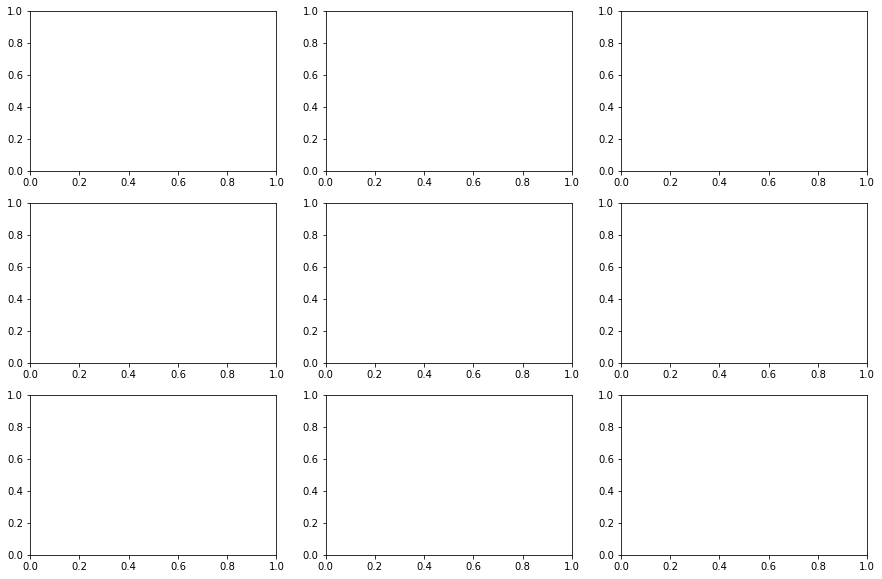

In [54]:
f, ax = plt.subplots(3,3,figsize=(15,10))
df_num.hist(ax = ax)
plt.show();

## Export data

In [74]:
df.reset_index(drop = False).to_csv('../data/intermediate_data/df.csv', index = False)